In [47]:
import numpy as np 
import pandas as pd 

In [48]:
df = pd.read_csv(r"D:\py_machine_learning\datasets\newplacementdata - newplacementdata.csv")
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1


In [ ]:
import seaborn as sns 
import matplotlib.pyplot as plt 

In [50]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

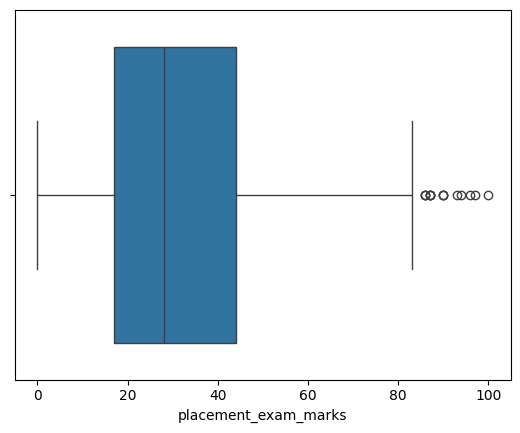

In [51]:
sns.boxplot(x=df['placement_exam_marks'])

In [52]:
# Finding the IQR 
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [53]:
percentile25

np.float64(17.0)

In [54]:
percentile75

np.float64(44.0)

In [55]:
IQR = percentile75 - percentile25
IQR

np.float64(27.0)

In [56]:
upper_limit = percentile75 + 1.5*IQR
upper_limit

np.float64(84.5)

In [57]:
lower_limit = percentile25 - 1.5*IQR
lower_limit

np.float64(-23.5)

In [58]:
# Finding outliers 

In [59]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [60]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


In [61]:
# Triming ---> 4(lower)....1, upper(25)...(50)---> here 1,50 are outliers ---> lower(4) <---> upper(25) mid data.
# Caping ---> 4(lower)....1, upper(25)...(50)---> caping lower point lowest point (1) upper point upper point(50) ---> Range expand ---> outliers remove.

In [62]:
# Trimming (Outliers Removing Technique 1)

In [63]:
newdf = df[df['placement_exam_marks']<upper_limit]

In [64]:
# newdf

<function matplotlib.pyplot.show(close=None, block=None)>

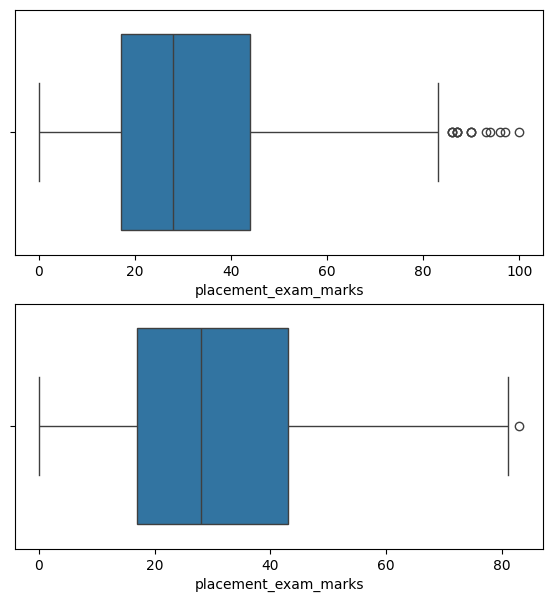

In [65]:
# Comparision 
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show

In [66]:
# Capping (Outliers Removing technique)

In [67]:
new_df_cap = df.copy() 

In [68]:
# min = 5, max = 15
# min 4, 3, 1
# max = 20, 30, 50

# update_min_value = 1
# updated_max_value = 50

In [69]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,upper_limit,

    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

<function matplotlib.pyplot.show(close=None, block=None)>

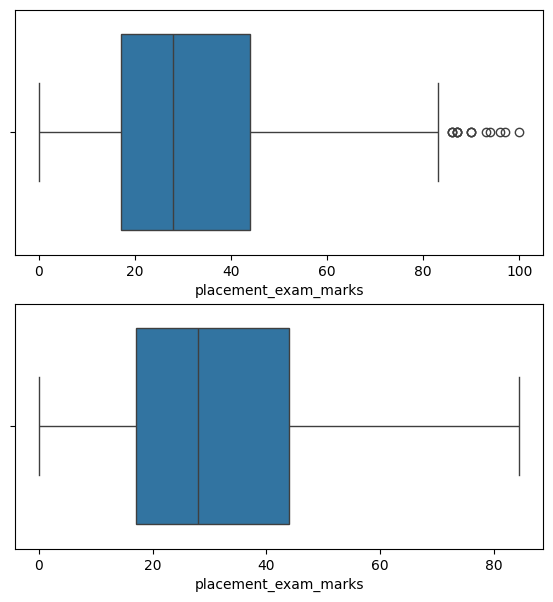

In [70]:
# Comparision 
plt.figure(figsize=(15,7))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])
plt.show